# Workshop 001: Python Data Engineer

#### By: Camila Cardona Alzate

In these workshop we are going to solve the requirements stated and show the diagrams and visualizations that help us explain the solutions. We are going to use SQLAlchemy as an ORM connected to MySQL and create visualizations using pyplot from matplotlib. 

Our first step is to create the connection to the db and create the table with the corresponding columns. 

In [1]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\camil\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
from sqlalchemy import Column, Integer, String, Boolean, Date, CHAR
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import json
import pandas as pd

with open('credentials.json', 'r') as json_file:
    data = json.load(json_file)
    user = data["user"]
    password = data["password"]
    server = data["server"]
    db = data["db"]

db_connection = f"mysql+mysqlconnector://{user}:{password}@{server}/{db}"

Base= declarative_base()

class Candidate(Base):
    __tablename__ = 'candidates'
    id = Column(Integer, primary_key=True, autoincrement=True)
    first_name = Column(String(50))
    last_name = Column(String(50))
    email = Column(String(100))
    application_date = Column(Date)
    country = Column(String(200))
    yoe = Column(Integer)
    seniority = Column(String(200))
    technology = Column(String(200))
    code_challenge_score = Column(Integer)
    technical_interview_score = Column(Integer)
    hired = Column(CHAR)

engine = create_engine(db_connection)
Base.metadata.create_all(engine)






We can confirm that the table is created: 

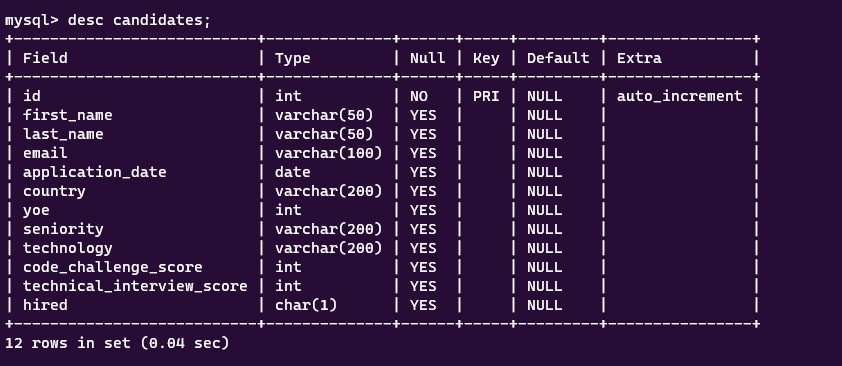



## EDA:

##### Before we upload the data we can make a descriptive analysis of the dataset:

In [3]:
import pandas as pd
data = pd.read_csv("candidates.csv", sep=';')

data.head()

,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [4]:
data.shape

(50000, 10)

##### There are 50000 rows in this dataset, with the information of candidates (I assume that are candidates of one company).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   first_name                 50000 non-null  object
 1   last_name                  50000 non-null  object
 2   email                      50000 non-null  object
 3   application_date           50000 non-null  object
 4   country                    50000 non-null  object
 5   yoe                        50000 non-null  int64 
 6   seniority                  50000 non-null  object
 7   technology                 50000 non-null  object
 8   code_challenge_score       50000 non-null  int64 
 9   technical_interview_score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


##### This indicate us that in the data there are no null values and we are working with objects and integers. 

In [6]:
min_date= data['application_date'].min()

max_date= data['application_date'].max()


print("The data goes from: "+ str(min_date)+ " to " + str(max_date))

The data goes from: 2018-01-01 to 2022-07-04


##### This data goes from the beginning of 2018 to july of 2022.

## Resolution:
##### The next step is to load the csv file with the information, including the code to fill the column "hired" that indicates whether a candidate was hired ("y") or not ("n").

In [7]:
Session = sessionmaker(bind=engine)
session = Session()



for _, row in data.iterrows():
    candidate = Candidate(
        first_name=row['first_name'],
        last_name=row['last_name'],
        email=row['email'],
        application_date=row['application_date'],
        country=row['country'],
        yoe=row['yoe'],
        seniority=row['seniority'],
        technology=row['technology'],
        code_challenge_score=row['code_challenge_score'],
        technical_interview_score=row['technical_interview_score']
    )
    
    # Calculate "hired" column

    if row['code_challenge_score'] >= 7 and row['technical_interview_score'] >= 7:
        candidate.hired = 'y'
    else:
        candidate.hired = 'n'
    
    session.add(candidate)


session.commit()
session.close()

Using pandas to insert the information of the csv, we can upload the information to the database: 

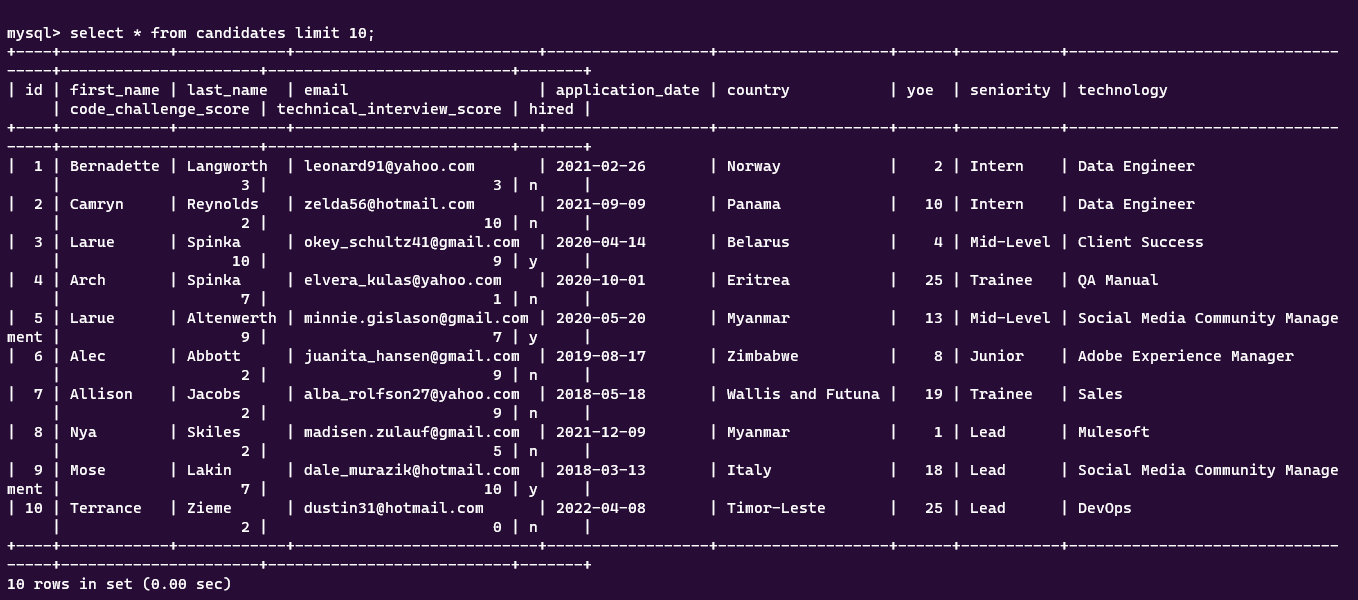

### QUERIES:

Now it's time to complete the task by creating visualizations depending the requirement.

#### 1. Hires by technology (pie chart): 

                                 Technology  Count
0                            Client Success    271
1         Social Media Community Management    237
2                     System Administration    293
3                          Game Development    519
4                                    Design    249
5                  Adobe Experience Manager    282
6                                    DevOps    495
7                                  Security    266
8   Business Analytics / Project Management    255
9                       Security Compliance    250
10                    Business Intelligence    254
11               Development - CMS Frontend    251
12                               Salesforce    256
13                   Development - Frontend    266
14                        Technical Writing    223
15                                 Mulesoft    260
16                            Data Engineer    255
17                                QA Manual    259
18                  Development

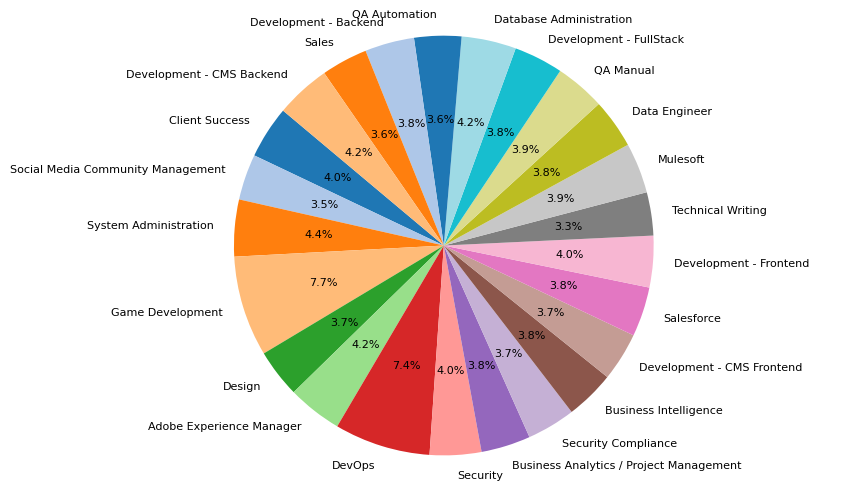

In [3]:
from sqlalchemy import func, extract
import matplotlib.pyplot as plt


Session = sessionmaker(bind=engine)
session = Session()


query = session.query(Candidate.technology, func.count(Candidate.id)).\
        filter(Candidate.hired == "y").\
        group_by(Candidate.technology).\
        all()

session.close()


df = pd.DataFrame(query, columns=['Technology', 'Count'])

print(df)

# Visualization:

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(df['Count'], labels=df['Technology'], autopct='%1.1f%%', textprops={'fontsize': 8}, colors=colors, startangle=140)
plt.axis('equal')  
plt.show()




##### In this graphic we can see that the top technology among the hired candidates was Game Development with 7.7% of all hires. Other popular technologies were DevOps with 7.4% and System Administration with 4.4%. There is a tie between Adobe Experience Manager, Development- CMS Backend, and Database Administration with 4.2%, and the less common technology was Technical Writing with 3.3%.

#### 2. Hires by year (horizontal bar chart):

   year  hires
0  2018   1409
1  2019   1524
2  2020   1485
3  2021   1485
4  2022    795


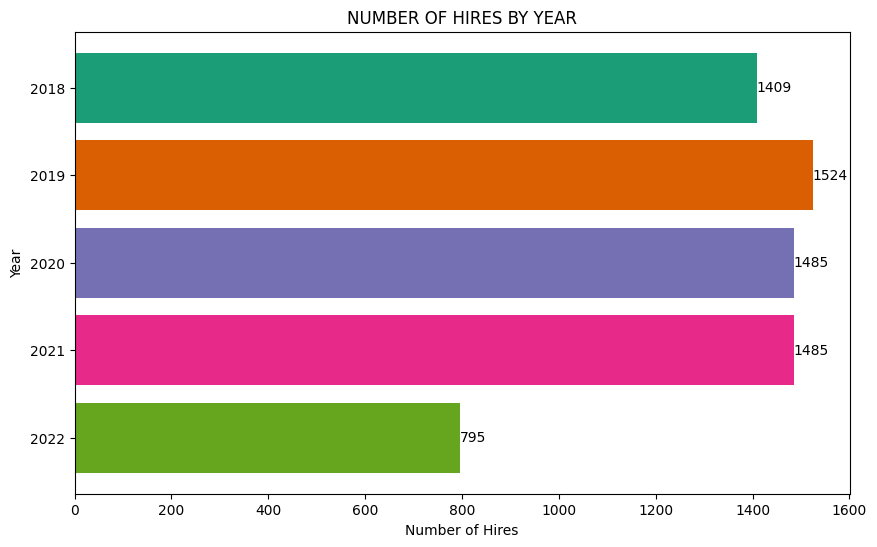

In [11]:
Session = sessionmaker(bind=engine)
session = Session()


query2 = session.query(extract('year', Candidate.application_date).label('year'), func.count(Candidate.id).label('hires')).\
        filter(Candidate.hired == 'y').\
        group_by('year').\
        order_by('year').\
        all()


session.close()


df = pd.DataFrame(query2)

print(df)

colors1 = plt.cm.Dark2.colors


# Visualization:


plt.figure(figsize=(10, 6))
bars = plt.barh(df['year'], df['hires'], color=colors1)
plt.xlabel('Number of Hires')
plt.ylabel('Year')
plt.title('NUMBER OF HIRES BY YEAR')
plt.gca().invert_yaxis()  

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', 
             va='center', ha='left', fontsize=10)

plt.show()

##### According to the chart, the number of hires has been relatively consistent over the past few years, with a slight dip in 2022. The top year with more hires is 2019 with 1524, there is a tie between the years 2020 and 2021 with 1485 hires, and the year with less hires is 2022. This is because the data from the year 2022 has registers until july. So, the year that is officially the one with less hires is 2018

#### 3. Hires by seniority (bar chart):

   seniority  hires
0  Mid-Level    924
1       Lead    929
2     Junior    977
3     Senior    939
4    Trainee    973
5     Intern    985
6  Architect    971


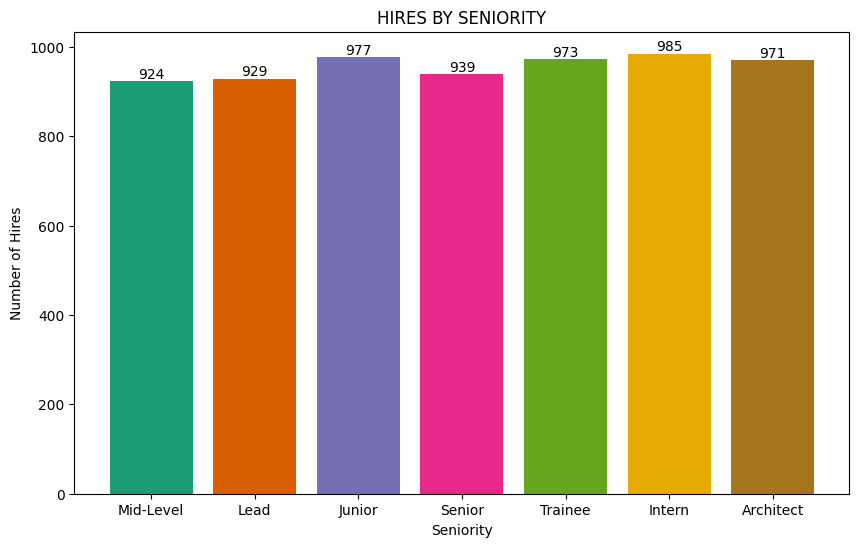

In [16]:
Session = sessionmaker(bind=engine)
session = Session()


query3 = session.query(Candidate.seniority, func.count(Candidate.id).label('hires')).\
        filter(Candidate.hired == 'y').\
        group_by(Candidate.seniority).\
        all()


session.close()


df = pd.DataFrame(query3)

print(df)

# Visualization:

plt.figure(figsize=(10, 6))
bars = plt.bar(df['seniority'], df['hires'], color= colors1)
plt.xlabel('Seniority')
plt.ylabel('Number of Hires')
plt.title('HIRES BY SENIORITY')


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             va='bottom', ha='center', fontsize=10)


plt.show()

##### In this bar chart we can see that the most hired seniority was “intern” with 985 hires. Other popular seniorities were “Junior” and “Trainee”. The seniority with fewer hires was “Mid-Level” with 924 candidates. With this we can notice that this dataset is randomly generated as this tendency does not agree with reality where the seniors are more hired than interns or people with less experience. But, if the data was real there could be an explanation: the company may be investing in developing talent internally. 

#### 4. Hires by country over years (USA, Brazil, Colombia, and Ecuador only)(multiline chart):

    year                   country  hires
0   2018                    Brazil      9
1   2018                  Colombia      7
2   2018                   Ecuador      1
3   2018  United States of America      5
4   2019                    Brazil      7
5   2019                  Colombia      8
6   2019                   Ecuador      3
7   2019  United States of America      3
8   2020                    Brazil      6
9   2020                  Colombia      8
10  2020                   Ecuador      8
11  2020  United States of America      4
12  2021                    Brazil      7
13  2021                  Colombia      1
14  2021                   Ecuador      5
15  2021  United States of America      8
16  2022                    Brazil      4
17  2022                  Colombia      1
18  2022                   Ecuador      3
19  2022  United States of America      5


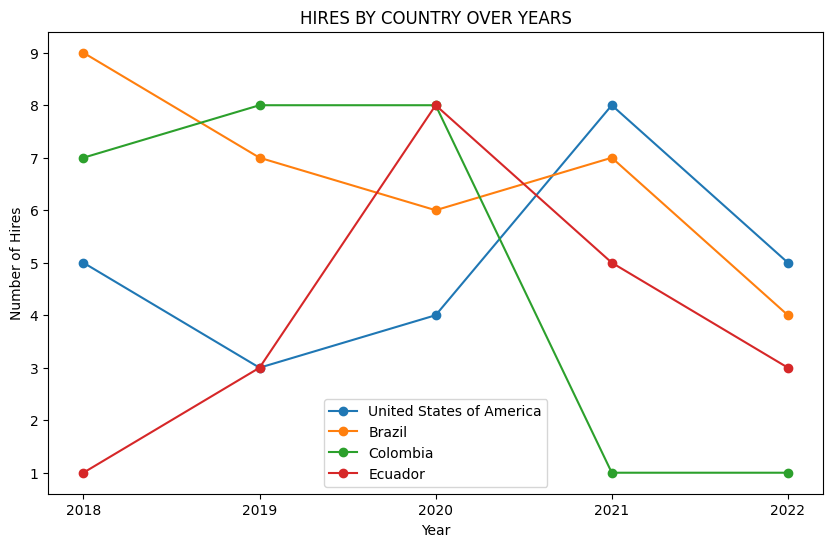

In [4]:
Session = sessionmaker(bind=engine)
session = Session()

# Define the list of countries
countries = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']

# Execute the query using SQLAlchemy
query4 = session.query(extract('year', Candidate.application_date).label('year'),
        Candidate.country,
        func.count(Candidate.id).label('hires')).\
        filter(Candidate.hired == 'y').\
        filter(Candidate.country.in_(countries)).\
        group_by('year', 'country').\
        order_by('year').\
        all()

session.close()


df = pd.DataFrame(query4)

print(df)

#Visualization:

plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['hires'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.title('HIRES BY COUNTRY OVER YEARS')
plt.legend()
plt.xticks(df['year'].unique()) 

plt.show()

##### According to this multi line chart, in 2018 the amount of hires was topped by Brazil with 9 hires, and Ecuador was the last one with 7 candidates hired. In 2019 the country with more hires was Colombia, and the last two, with a tie, were USA and Ecuador. In 2020 Ecuador and Colombia had 8 hired candidates as the top countries, and the USA had 4. In 2021, the USA was in the top with 8 hires and Colombia in the bottom with 1 candidate hired. Finally, in 2022 USA was again in the top with 5 candidates hired and Colombia kept with one hired. 